<a href="https://colab.research.google.com/github/zaku2590/finantext/blob/main/FinalAssignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings('ignore')


In [19]:
path = '/content/'

user_df = pd.read_csv(path + 'user.csv')
pop_df = pd.read_csv(path + 'jinkou_doutai.csv')

display(user_df.shape[0])
display(user_df.info())
display(user_df.head())
display(user_df.isnull().sum())
display(pop_df.shape[0])
display(pop_df.info())
display(pop_df.head())
display(pop_df.isnull().sum())


1000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      1000 non-null   int64
 1   age     1000 non-null   int64
 2   gender  1000 non-null   int64
dtypes: int64(3)
memory usage: 23.6 KB


None

,id,age,gender
0,0,64,2
1,1,54,1
2,2,79,2
3,3,59,1
4,4,44,1


,0
id,0
age,0
gender,0


26

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         26 non-null     int64
 1   gender      26 non-null     int64
 2   population  26 non-null     int64
dtypes: int64(3)
memory usage: 756.0 bytes


None

,age,gender,population
0,24,1,321
1,29,1,328
2,34,1,333
3,39,1,372
4,44,1,411


,0
age,0
gender,0
population,0


In [20]:
user_dist = user_df.groupby(['age', 'gender']).size().reset_index(name='count')
user_dist['ratio'] = user_dist['count'] / user_dist['count'].sum()


pop_df['population'] = pop_df['population'] * 10000

target_pairs = user_dist[['age', 'gender']]
pop_df = pd.merge(pop_df, target_pairs, on=['age', 'gender'])

pop_df['ratio'] = pop_df['population'] / pop_df['population'].sum()

compare_df = pd.merge(user_dist, pop_df, on=['age', 'gender'], suffixes=('_user', '_pop'))
display(compare_df.head(20))


,age,gender,count,ratio_user,population,ratio_pop
0,24,1,31,0.031,3210000,0.032572
1,24,2,42,0.042,3050000,0.030949
2,29,1,29,0.029,3280000,0.033283
3,29,2,23,0.023,3110000,0.031558
4,34,1,30,0.030,3330000,0.033790
5,34,2,33,0.033,3190000,0.032369
6,39,1,28,0.028,3720000,0.037747
7,39,2,31,0.031,3600000,0.036530
8,44,1,54,0.054,4110000,0.041705
9,44,2,49,0.049,3990000,0.040487


In [21]:
pivot_df = compare_df.pivot(index='age', columns='gender', values='ratio_user')
pivot_df.columns = ['クレカ利用者（男性）', 'クレカ利用者（女性）']

pivot_df['人口割合（男性）'] = compare_df[compare_df['gender'] == 1].set_index('age')['ratio_pop']
pivot_df['人口割合（女性）'] = compare_df[compare_df['gender'] == 2].set_index('age')['ratio_pop']

pivot_df = pivot_df.sort_index()

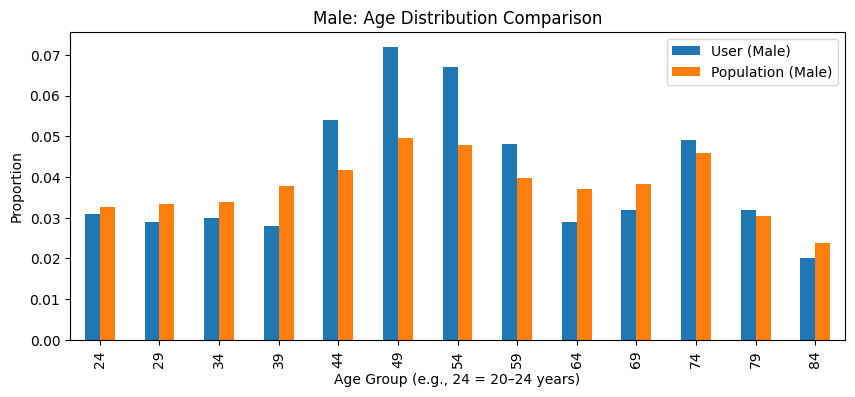

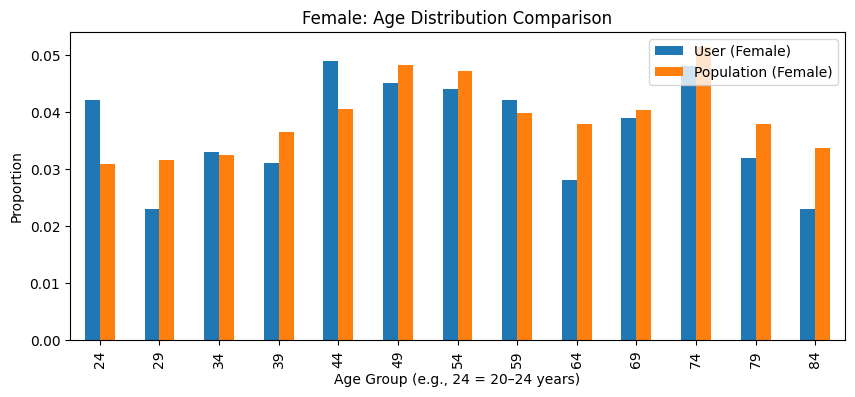

In [22]:
pivot_df[['クレカ利用者（男性）', '人口割合（男性）']].plot(
    kind='bar',
    figsize=(10, 4),
    title='Male: Age Distribution Comparison'
)
plt.xlabel("Age Group (e.g., 24 = 20–24 years)")
plt.ylabel("Proportion")
plt.legend(['User (Male)', 'Population (Male)'], loc='upper right')
plt.show()

pivot_df[['クレカ利用者（女性）', '人口割合（女性）']].plot(
    kind='bar',
    figsize=(10, 4),
    title='Female: Age Distribution Comparison'
)
plt.xlabel("Age Group (e.g., 24 = 20–24 years)")
plt.ylabel("Proportion")
plt.legend(['User (Female)', 'Population (Female)'], loc='upper right')
plt.show()